In [17]:
# Project: Coffee Sales Regression (Public Dataset)
# Author: BP0313270

#  Check versions
import sys, platform, numpy as np, pandas as pd, matplotlib, sklearn
print({
    "python": sys.version.split()[0],
    "platform": platform.platform(),
    "pandas": pd.__version__,
    "numpy": np.__version__,
    "sklearn": sklearn.__version__,
    "matplotlib": matplotlib.__version__,
})


{'python': '3.12.12', 'platform': 'Linux-6.6.105+-x86_64-with-glibc2.35', 'pandas': '2.2.2', 'numpy': '2.0.2', 'sklearn': '1.6.1', 'matplotlib': '3.10.0'}


In [18]:
#  Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# READ DATA
import pandas as pd
csv_path = '/content/drive/MyDrive/Coffe_sales.csv'
df = pd.read_csv(csv_path)


df.head(), df.shape


(   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
 0           10      card   38.7          Latte     Morning     Fri        Mar   
 1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
 2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
 3           13      card   28.9      Americano   Afternoon     Fri        Mar   
 4           13      card   38.7          Latte   Afternoon     Fri        Mar   
 
    Weekdaysort  Monthsort      Date      Time  
 0            5          3  3/1/2024  10:15:51  
 1            5          3  3/1/2024  12:19:23  
 2            5          3  3/1/2024  12:20:18  
 3            5          3  3/1/2024  13:46:33  
 4            5          3  3/1/2024  13:48:15  ,
 (3547, 11))

In [20]:
import pandas as pd

# Load the file
df_check = pd.read_csv('/content/drive/MyDrive/Coffe_sales.csv')

# Show dataset structure and first few rows
print(df_check.info())
display(df_check.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB
None


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,3/1/2024,10:15:51
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,3/1/2024,12:19:23
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,3/1/2024,12:20:18
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,3/1/2024,13:46:33
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,3/1/2024,13:48:15
5,15,card,33.8,Americano with Milk,Afternoon,Fri,Mar,5,3,3/1/2024,15:39:48
6,16,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,3/1/2024,16:19:03
7,18,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,3/1/2024,18:39:04
8,19,card,38.7,Cocoa,Night,Fri,Mar,5,3,3/1/2024,19:22:02
9,19,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,3/1/2024,19:23:16


In [21]:
# Fix Date and Time columns
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce', format='%H:%M:%S').dt.time
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')

df[['Date', 'Time', 'Datetime']].head()


,Date,Time,Datetime
0,2024-03-01,10:15:51,2024-03-01 10:15:51
1,2024-03-01,12:19:23,2024-03-01 12:19:23
2,2024-03-01,12:20:18,2024-03-01 12:20:18
3,2024-03-01,13:46:33,2024-03-01 13:46:33
4,2024-03-01,13:48:15,2024-03-01 13:48:15


In [22]:
#  Keep columns
cols_wanted = [
    'money','hour_of_day','coffee_name','Time_of_Day','Weekday',
    'Month_name','cash_type','Date','Time','Weekdaysort','Monthsort'
]
df = df[[c for c in cols_wanted if c in df.columns]].copy()

#  CLEAN THE DATE COLUMN
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date'])
    print("Date range:", df['Date'].min(), ">", df['Date'].max())

#  numeric
df['money'] = pd.to_numeric(df['money'], errors='coerce')

#  remove rows missing essential fields
req = ['money','hour_of_day','coffee_name','Time_of_Day','Weekday','Month_name']
df = df.dropna(subset=[c for c in req if c in df.columns])

#  tidy columns
for c in ['coffee_name','Time_of_Day','Weekday','Month_name','cash_type']:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip().astype('category')

#  Order categories
if 'Time_of_Day' in df.columns:
    df['Time_of_Day'] = pd.Categorical(
        df['Time_of_Day'], categories=['Morning','Afternoon','Night'], ordered=True
    )
if 'Weekday' in df.columns:
    df['Weekday'] = pd.Categorical(
        df['Weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ordered=True
    )

df.head(), df.dtypes


Date range: 2024-03-01 00:00:00 > 2025-03-23 00:00:00


(   money  hour_of_day    coffee_name Time_of_Day Weekday Month_name cash_type  \
 0   38.7           10          Latte     Morning     Fri        Mar      card   
 1   38.7           12  Hot Chocolate   Afternoon     Fri        Mar      card   
 2   38.7           12  Hot Chocolate   Afternoon     Fri        Mar      card   
 3   28.9           13      Americano   Afternoon     Fri        Mar      card   
 4   38.7           13          Latte   Afternoon     Fri        Mar      card   
 
         Date      Time  Weekdaysort  Monthsort  
 0 2024-03-01  10:15:51            5          3  
 1 2024-03-01  12:19:23            5          3  
 2 2024-03-01  12:20:18            5          3  
 3 2024-03-01  13:46:33            5          3  
 4 2024-03-01  13:48:15            5          3  ,
 money                 float64
 hour_of_day             int64
 coffee_name          category
 Time_of_Day          category
 Weekday              category
 Month_name           category
 cash_type         

In [23]:
# Metrics
total_revenue = df['money'].sum()
avg_spend = df['money'].mean()
num_transactions = df.shape[0]

print(" Coffee Sales Summary (Mar 2024 – Mar 2025)")
print("------------------------------------------------")
print(f"Total Transactions: {num_transactions:,}")
print(f"Total Revenue: £{total_revenue:,.2f}")
print(f"Average Spend per Transaction: £{avg_spend:.2f}")


 Coffee Sales Summary (Mar 2024 – Mar 2025)
------------------------------------------------
Total Transactions: 3,547
Total Revenue: £112,245.58
Average Spend per Transaction: £31.65


Basic Data Overview:


,money,hour_of_day,coffee_name,Time_of_Day,Weekday,Month_name,cash_type,Date,Time,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547,3547,3547,3547,3547,3547,3547,3547.000000,3547.000000
unique,NaN,NaN,8,3,7,12,1,NaN,3442,NaN,NaN
top,NaN,NaN,Americano with Milk,Afternoon,Tue,Mar,card,NaN,10:44:56,NaN,NaN
freq,NaN,NaN,809,1205,572,494,3547,NaN,3,NaN,NaN
mean,31.645216,14.185791,NaN,NaN,NaN,NaN,NaN,2024-10-04 17:34:43.676346368,NaN,3.845785,6.453905
min,18.120000,6.000000,NaN,NaN,NaN,NaN,NaN,2024-03-01 00:00:00,NaN,1.000000,1.000000
25%,27.920000,10.000000,NaN,NaN,NaN,NaN,NaN,2024-07-17 12:00:00,NaN,2.000000,3.000000
50%,32.820000,14.000000,NaN,NaN,NaN,NaN,NaN,2024-10-10 00:00:00,NaN,4.000000,7.000000
75%,35.760000,18.000000,NaN,NaN,NaN,NaN,NaN,2025-01-11 00:00:00,NaN,6.000000,10.000000
max,38.700000,22.000000,NaN,NaN,NaN,NaN,NaN,2025-03-23 00:00:00,NaN,7.000000,12.000000


Unique Time_of_Day: ['Morning', 'Afternoon', 'Night']
Unique Weekday: ['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu']


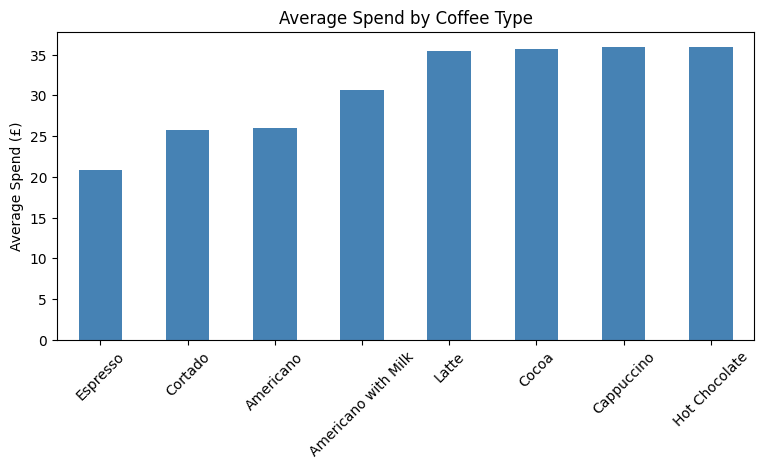

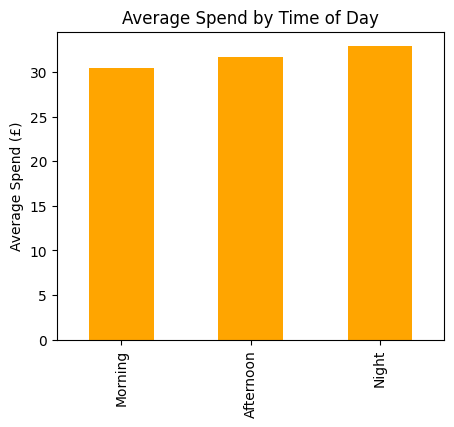

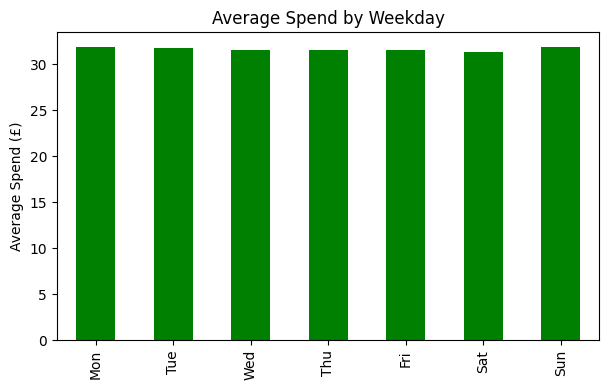

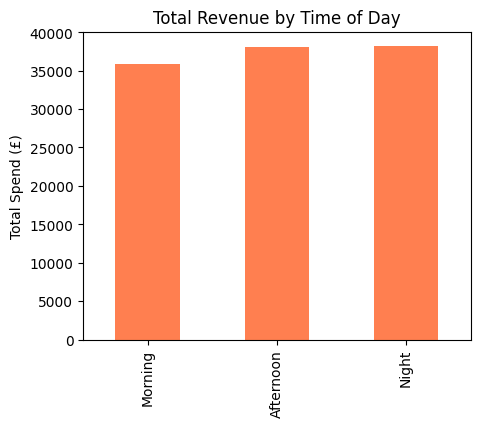

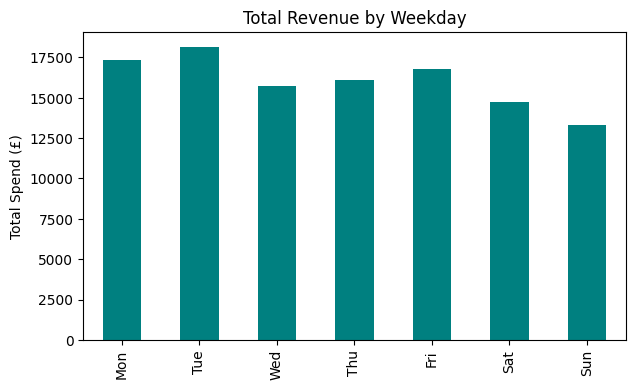

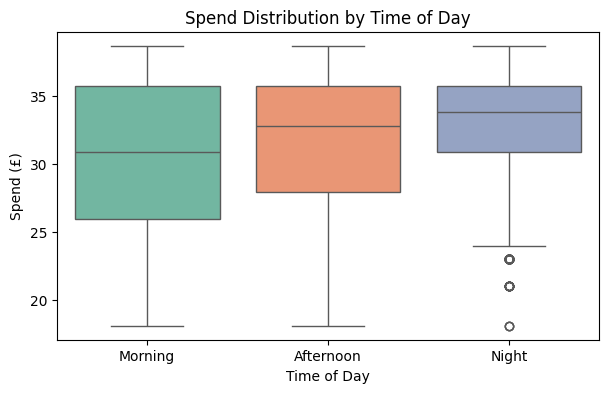

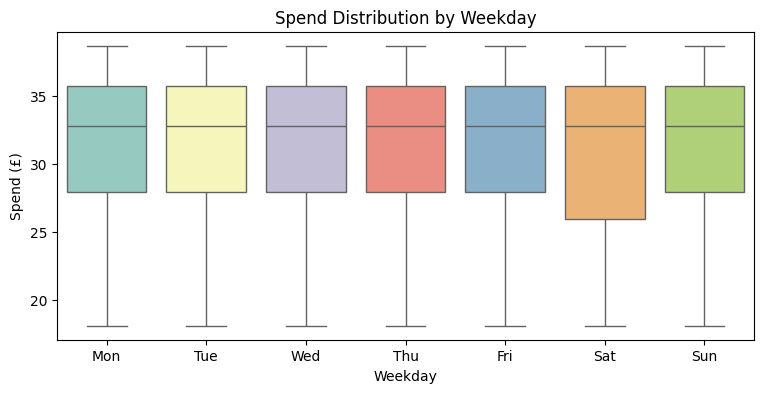

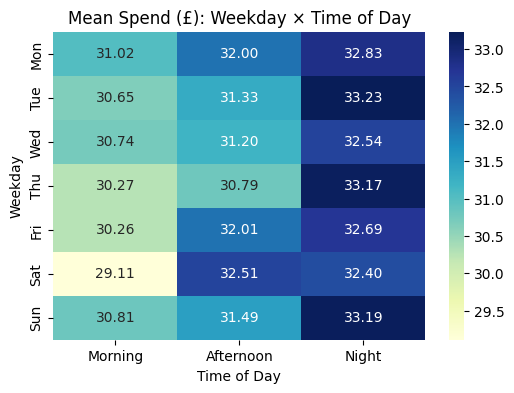

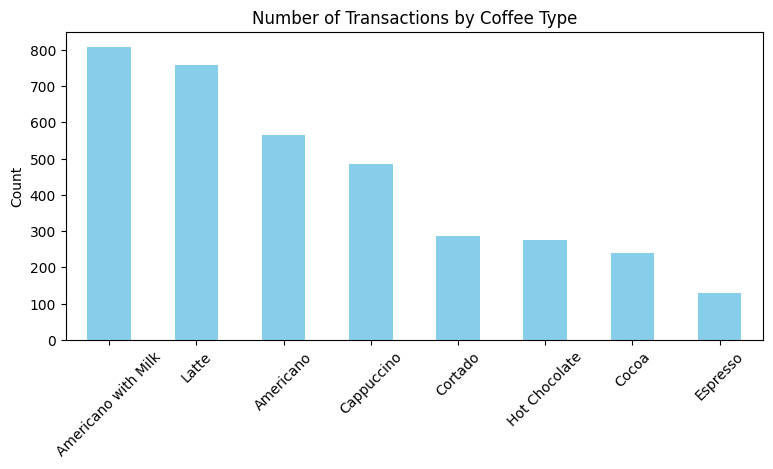

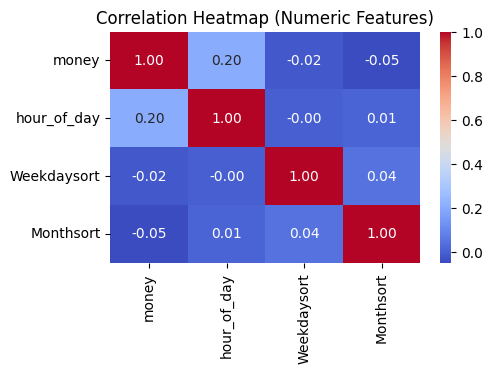

In [24]:
#  EXPLORATORY DATA VISUALISATION

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

# Summary
print("Basic Data Overview:")
display(df.describe(include='all'))

# Category Order Confirmaton
if 'Time_of_Day' in df.columns:
    print("Unique Time_of_Day:", df['Time_of_Day'].unique().tolist())
if 'Weekday' in df.columns:
    print("Unique Weekday:", df['Weekday'].unique().tolist())

# Average Spend by Coffee Type
(df.groupby('coffee_name', observed=True)['money']
   .mean()
   .sort_values()
   .plot(kind='bar', figsize=(9,4), color='steelblue'))
plt.title('Average Spend by Coffee Type')
plt.ylabel('Average Spend (£)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

# Average Spend by time of day
(df.groupby('Time_of_Day', observed=True)['money']
   .mean()
   .plot(kind='bar', figsize=(5,4), color='orange'))
plt.title('Average Spend by Time of Day')
plt.ylabel('Average Spend (£)')
plt.xlabel('')
plt.show()

# Average Spend Weekday
(df.groupby('Weekday', observed=True)['money']
   .mean()
   .plot(kind='bar', figsize=(7,4), color='green'))
plt.title('Average Spend by Weekday')
plt.ylabel('Average Spend (£)')
plt.xlabel('')
plt.show()

# Revenue by Time of Day
(df.groupby('Time_of_Day', observed=True)['money']
   .sum()
   .plot(kind='bar', figsize=(5,4), color='coral'))
plt.title('Total Revenue by Time of Day')
plt.ylabel('Total Spend (£)')
plt.xlabel('')
plt.show()

# Revenue by Weekday
(df.groupby('Weekday', observed=True)['money']
   .sum()
   .plot(kind='bar', figsize=(7,4), color='teal'))
plt.title('Total Revenue by Weekday')
plt.ylabel('Total Spend (£)')
plt.xlabel('')
plt.show()

#  Spend  by Time of Day
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Time_of_Day', y='money', palette='Set2')
plt.title('Spend Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Spend (£)')
plt.show()

#  Spend by Weekday ---
plt.figure(figsize=(9,4))
sns.boxplot(data=df, x='Weekday', y='money', palette='Set3')
plt.title('Spend Distribution by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Spend (£)')
plt.show()

# Heatmap: Mean Spend by Weekday × Time of Day
if 'Weekday' in df.columns and 'Time_of_Day' in df.columns:
    pivot_mean = df.pivot_table(
        index='Weekday', columns='Time_of_Day', values='money', aggfunc='mean'
    )
    plt.figure(figsize=(6,4))
    sns.heatmap(pivot_mean, annot=True, fmt='.2f', cmap='YlGnBu')
    plt.title('Mean Spend (£): Weekday × Time of Day')
    plt.ylabel('Weekday')
    plt.xlabel('Time of Day')
    plt.show()

#  Volume by Coffee Type
df['coffee_name'].value_counts().plot(
    kind='bar', figsize=(9,4), color='skyblue'
)
plt.title('Number of Transactions by Coffee Type')
plt.ylabel('Count')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

# Numeric Correlations Heatmap
num_cols = [c for c in ['money','hour_of_day','Weekdaysort','Monthsort'] if c in df.columns]
if len(num_cols) > 1:
    plt.figure(figsize=(5,3))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap (Numeric Features)')
    plt.show()












In [25]:
from sklearn.model_selection import train_test_split

# Drop identifiers
drop_id_cols = [c for c in ['Date','Time'] if c in df.columns]

X = df.drop(columns=['money'] + drop_id_cols)
y = df['money']

#  One-hot encode categories
X_encoded = pd.get_dummies(X, drop_first=True)

#  Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((2837, 29), (710, 29))

In [26]:
from sklearn.linear_model import LinearRegression

# baseline model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Show which features have the biggest positive or negative effect on spend
coef_df = (pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
           .assign(Abs=lambda d: d['Coefficient'].abs())
           .sort_values('Abs', ascending=False)
           .drop(columns='Abs'))
coef_df.head(15)


,Feature,Coefficient
8,coffee_name_Hot Chocolate,9.927501
9,coffee_name_Latte,9.858195
4,coffee_name_Cappuccino,9.846438
5,coffee_name_Cocoa,9.780748
3,coffee_name_Americano with Milk,4.979329
7,coffee_name_Espresso,-4.716603
21,Month_name_Jan,-4.026643
18,Month_name_Aug,-3.611194
20,Month_name_Feb,-3.507970
22,Month_name_Jul,-3.439730


In [27]:
# R2 and RMSE

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

r2   = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 (Coefficient of Determination): {r2:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")


R2 (Coefficient of Determination): 0.977
Root Mean Squared Error (RMSE): 0.733


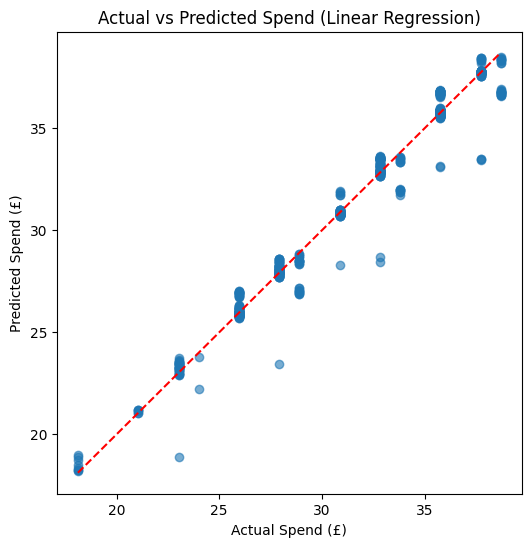

In [28]:
#  Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.xlabel("Actual Spend (£)"); plt.ylabel("Predicted Spend (£)")
plt.title("Actual vs Predicted Spend (Linear Regression)")
plt.show()


In [29]:
#  Save Clean Dataset
import joblib
df.to_csv('cleaned_coffee_sales.csv', index=False)
joblib.dump(model, 'coffee_sales_model.pkl')
print("Saved: cleaned_coffee_sales.csv, coffee_sales_model.pkl")


Saved: cleaned_coffee_sales.csv, coffee_sales_model.pkl
